In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset 

df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# checking rows and columns

df.shape 

(1000, 8)

# Data Checks to performs when a dataset is Come in Hand

#### Missing Values
#### Duplicates
#### Data Types
#### Numbers of Unique Values of Each Columns
#### Statistics of the Data
#### Various Categories present in the Different Categoriacal Column 

In [5]:
# Checking Missing Values

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Observation

#### There are no Missing Values

In [6]:
# another method to check the missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Check Duplicates

In [7]:
df.duplicated().sum()

0

In [8]:
# in the above dataset, there are no duplicates

# Checking the Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Checking the Number of Uniques Values

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# Statistics of the Dataset 

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# From the Above Analysis
#### Mean range is form 66 to 69
#### Standard deviation is from 14.6 to 15.19 showing the data distribution is the same type
#### Minimum value in maths is 0 means someone got 0 in the maths. similarly in reading scoreminimum 17 and writing score is 10
#### Max value is 100 in all test 
#### All means are very close to each other 

# Exploring more info about the Data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Separating Numerical and Categorical Features

In [15]:
[feature for feature in df.columns if df[feature].dtype != 'O']

['math_score', 'reading_score', 'writing_score']

In [16]:
# Separation for numerical and categorical columns

numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']


In [17]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [18]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

in the above dataset, there are three numerical columns. we combine the score, make total score and avarage score. 

we have to compare the total and avarage score for each categorical features

like male got more numbers or female

group c got more number or group d



In [21]:
# aggergating total score with mean


df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['avg_score'] = df['total_score'] / 3

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Exploring More Visualization

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

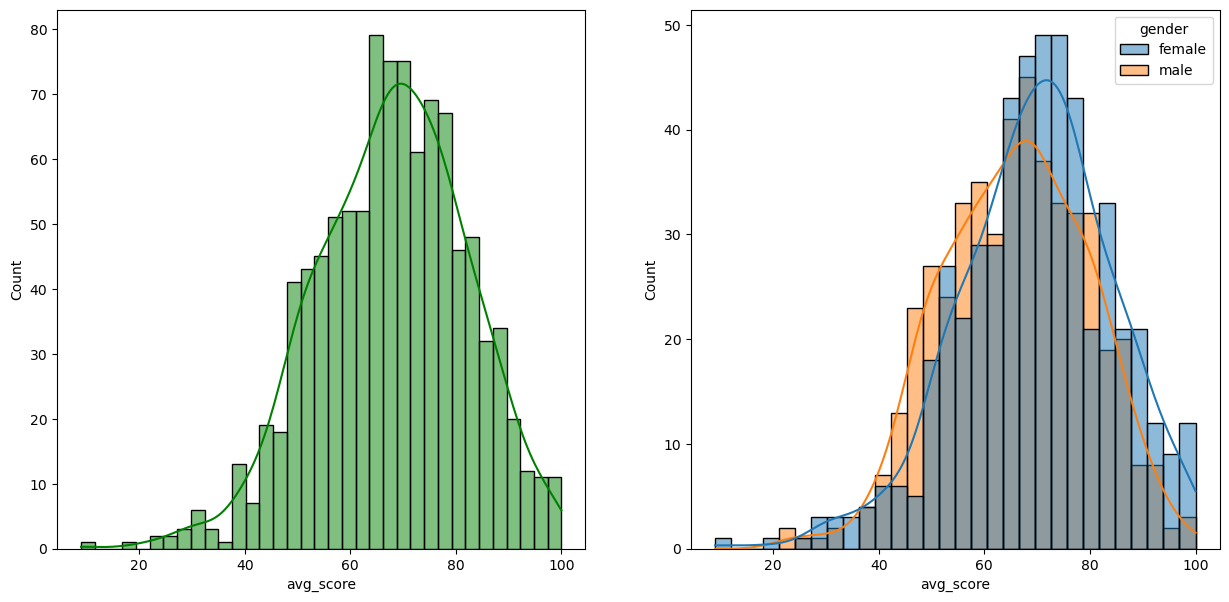

In [25]:
fig,axis = plt.subplots(1,2, figsize= (15,7)) # 1,2 = 1 row 2 columns

plt.subplot(121) # 121 tells that from the 2 columns, in 1st column is plotting

sns.histplot(data= df, x = 'avg_score', bins= 35, kde= True, color = 'g')


plt.subplot(122) # for the second box. first 1 and 2 expressing the 1 row and 2 column. and the last 2 is showing where we implement this plot

sns.histplot(data = df, x = 'avg_score', bins = 30, kde = True, hue = 'gender')

## Insights

- Female student tend to perform well than male students

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

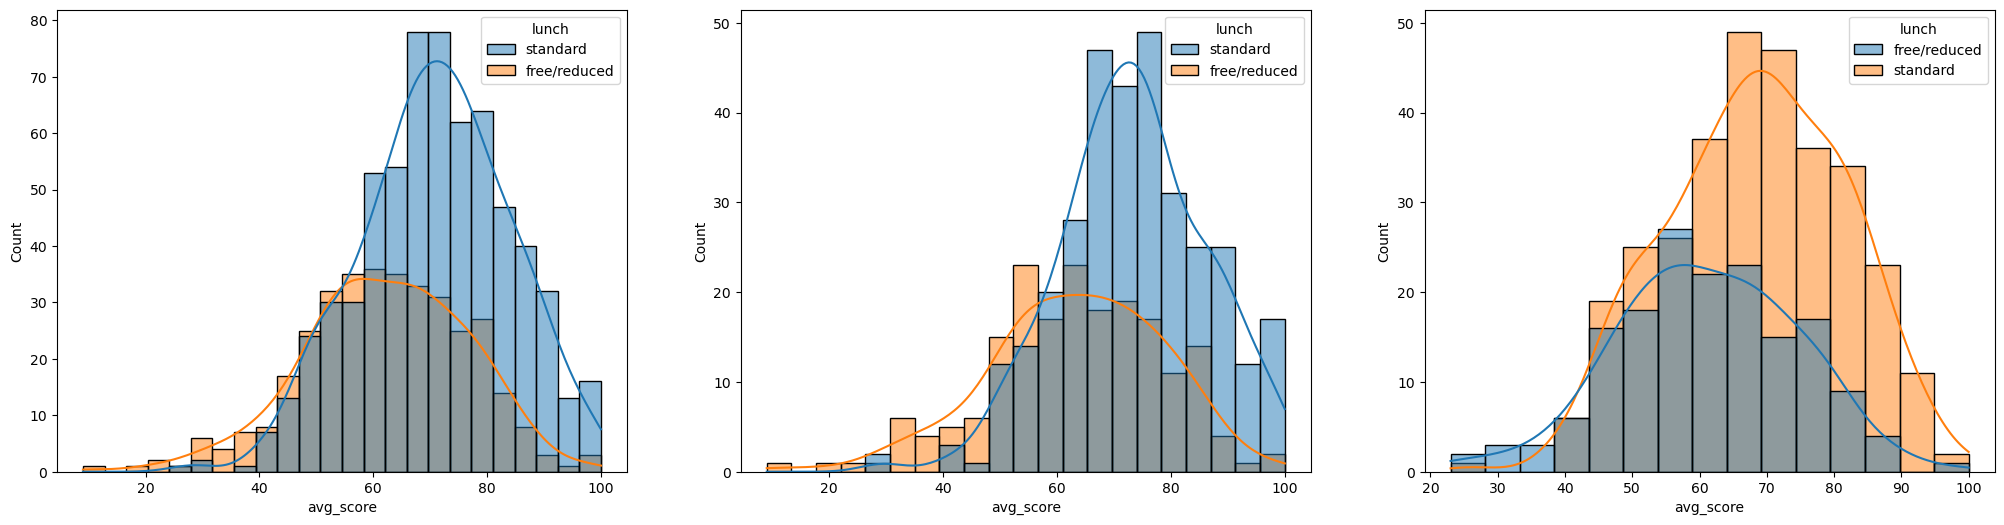

In [30]:
# cheking from the lunch point of view

plt.subplots(1,3, figsize = (25,6))

plt.subplot(131)

sns.histplot(data=df, x = 'avg_score', kde = True, hue = 'lunch')

plt.subplot(132)

sns.histplot(data = df[df.gender == 'female'], x = 'avg_score', kde = True, hue = 'lunch')

plt.subplot(133)

sns.histplot(data = df[df.gender == 'male'], x = 'avg_score', kde = True, hue = 'lunch')

## Insights

- The student having standard lunch helps in making score as compared to free or reduced lunch
- Standard lunch helps to perform well in exam for male and female both

In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='avg_score', ylabel='Count'>

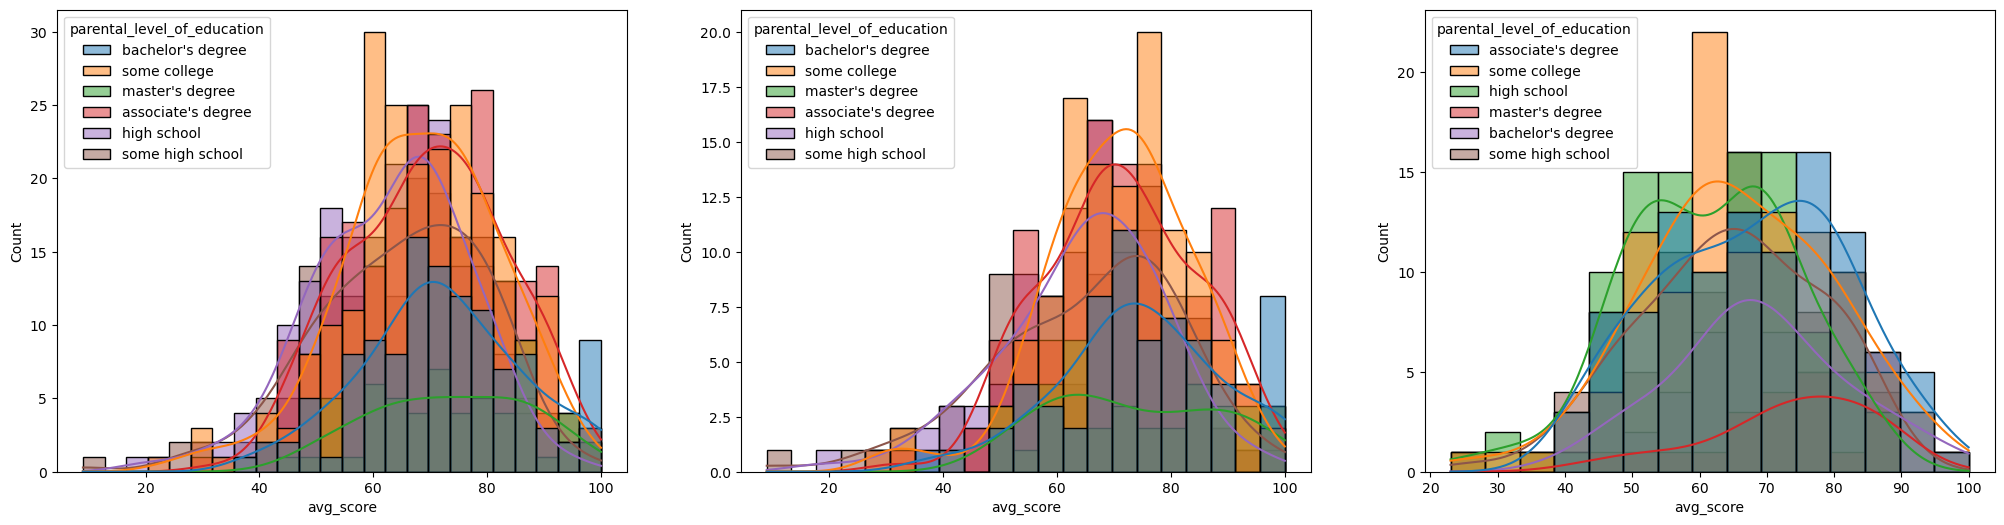

In [32]:
# cheking from the parental_level_of_education point of view

plt.subplots(1,3, figsize = (25,6))

plt.subplot(131)

sns.histplot(data=df, x = 'avg_score', kde = True, hue = 'parental_level_of_education')

plt.subplot(132)

sns.histplot(data = df[df.gender == 'female'], x = 'avg_score', kde = True, hue = 'parental_level_of_education')

plt.subplot(133)

sns.histplot(data = df[df.gender == 'male'], x = 'avg_score', kde = True, hue = 'parental_level_of_education')

# Insights

- student which have master degree parent are having avarage score more than the others
- student which have associate degree parent are having avarage score more
- for female student, the parent level of education does not help that much 
- in general, parent's education does not help the students to perform well in exams 

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

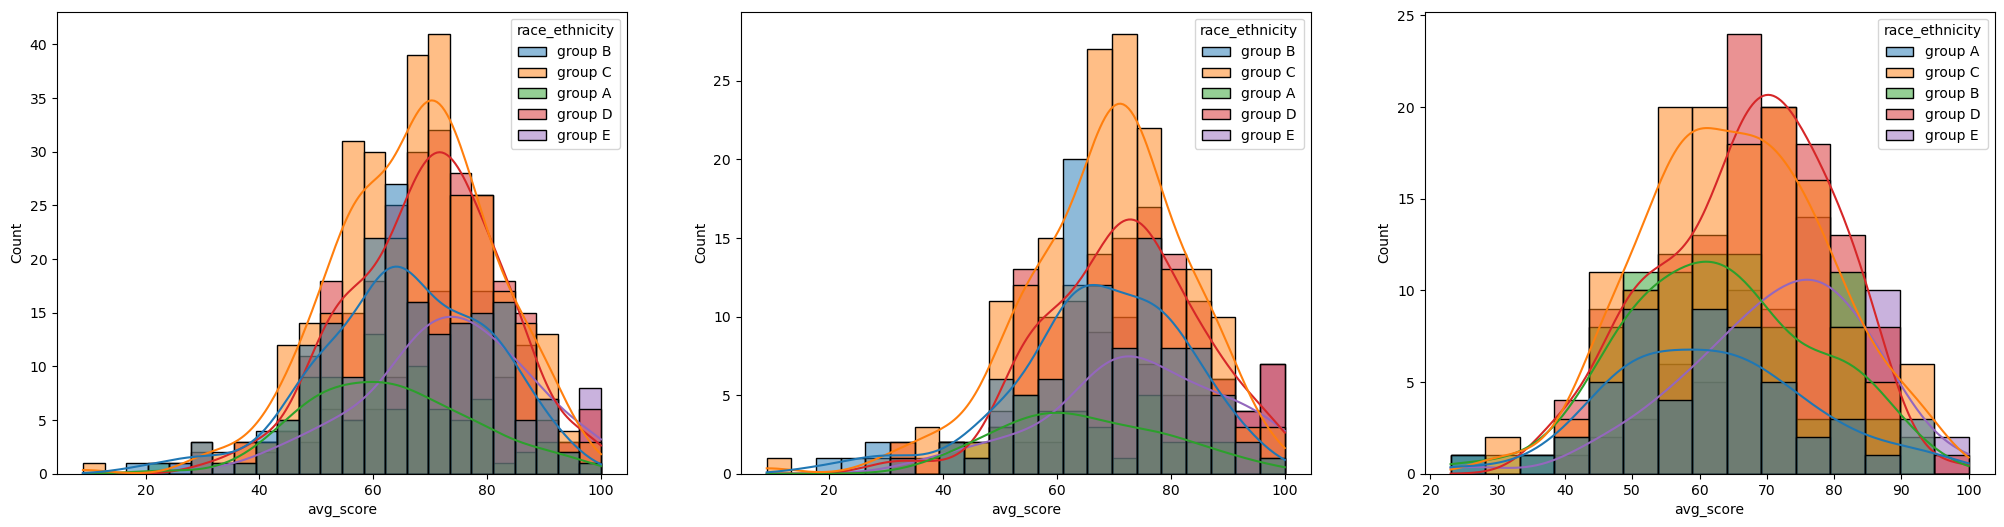

In [33]:
# cheking from the race_ethnicity point of view

plt.subplots(1,3, figsize = (25,6))

plt.subplot(131)

sns.histplot(data=df, x = 'avg_score', kde = True, hue = 'race_ethnicity')

plt.subplot(132)

sns.histplot(data = df[df.gender == 'female'], x = 'avg_score', kde = True, hue = 'race_ethnicity')

plt.subplot(133)

sns.histplot(data = df[df.gender == 'male'], x = 'avg_score', kde = True, hue = 'race_ethnicity')